In [6]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor, Mode
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Create indexes

In [2]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
#     return df_features

In [3]:
# # neural network efficientnet features
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'angular')

In [4]:
# neural network efficientnet features pc
create_index('../data/nn_features_pca.csv', '../indexes/', 'neural_network_pca', 'angular')

In [3]:
# # neural network resnet features
create_index('../data/nn_resnet_features.csv', '../indexes/', 'neural_network_resnet', 'angular')

In [4]:
# neural network resnet features pc
create_index('../data/nn_resnet_features_pca.csv', '../indexes/', 'neural_network_resnet_pca', 'angular')

In [5]:
# # color features
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [6]:
# color features pca
create_index('../data/color_features_pca.csv', '../indexes/', 'color_pca', 'euclidean')

In [7]:
# # color features center subregions
create_index('../data/color_features_center_subregions.csv', '../indexes/', 'color_center_subregions', 'euclidean')

In [8]:
# color features center subregions pca
create_index('../data/color_features_center_subregions_pca.csv', '../indexes/', 'color_center_subregions_pca', 'euclidean')

In [9]:
# # BOVW features
# create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'angular')

In [10]:
# # BOVW features pca
# create_index('../data/BOVW_features_pca.csv', '../indexes/', 'bovw_pca', 'angular')

In [11]:
# # HOG features
create_index('../data/hog_features.csv', '../indexes/', 'hog', 'euclidean')

In [12]:
# HOG features pca
create_index('../data/hog_features_pca.csv', '../indexes/', 'hog_pca', 'euclidean')

In [13]:
# # color + HOG features
# create_index('../data/merged_color_hog_features.csv', '../indexes/', 'color_hog', 'angular')

In [14]:
# color + HOG features with pca
create_index('../data/hog_color_features_pca.csv', '../indexes/', 'hog_color_pca', 'euclidean')

In [15]:
# # color + HOG features with pca and standardization
# create_index('../data/merged_color_hog_pca_std.csv', '../indexes/', 'color_hog_pca_std', 'angular')

# Test retrieval

In [7]:
# utils
def show_images(idx, names_df, img_path):
    # plot starting image
    img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(img_rgb)
    plt.show()
    # extract names
    names = names_df.loc[idx,'name'].values
    # prepare plot
    n_elements = len(names)
    fig, ax = plt.subplots(1,n_elements,figsize=(12,6))
    for i in range(0,n_elements):
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        ax[i].imshow(tmp)
    plt.show()
    return names

# efficientnet
def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])

# resnet
def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    return img_data


In [331]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)
# choose image
img_path = '../test_imgs/pinopino.jpg'
# settings
n_neighbours = 10

loading neural_network ...
loading neural_network_pca ...
loading color ...
loading color_pca ...
loading color_center_subregions ...
loading color_center_subregions_pca ...
loading hog ...
loading hog_pca ...
loading hog_color_pca ...
loading neural_network_resnet ...
loading neural_network_resnet_pca ...


## Neural network resnet

In [332]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [333]:
# read model
model = ResNet50(weights='imagenet', include_top=False, pooling='max')

In [334]:
# NN
img_features_nn = model.predict(loadimg(img_path))[0]

In [335]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network_resnet', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [336]:
distances

[0.6800212860107422,
 0.6968611478805542,
 0.7020205855369568,
 0.7097958326339722,
 0.7104888558387756,
 0.7113511562347412,
 0.7122644782066345,
 0.7133538126945496,
 0.7155762314796448,
 0.7162829041481018]

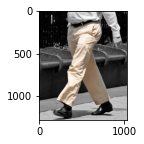

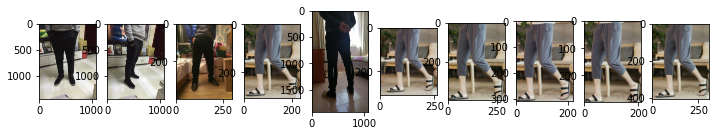

array(['11185.jpg', '11182.jpg', '13583.jpg', '11937.jpg', '10139.jpg',
       '11935.jpg', '11934.jpg', '11948.jpg', '11940.jpg', '11945.jpg'],
      dtype=object)

In [337]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network resnet PCA

In [338]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [339]:
# read model
model = ResNet50(weights='imagenet', include_top=False, pooling='max')

In [340]:
# NN
img_features_nn = model.predict(loadimg(img_path))[0]
# read pca model
with open('../data/pca_nn_resnet.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [341]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_resnet_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [342]:
distances

[0.8260303735733032,
 0.8329813480377197,
 0.8384268283843994,
 0.8429086804389954,
 0.8501666188240051,
 0.8555582165718079,
 0.8609383702278137,
 0.861318826675415,
 0.8660144805908203,
 0.8681329488754272]

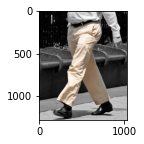

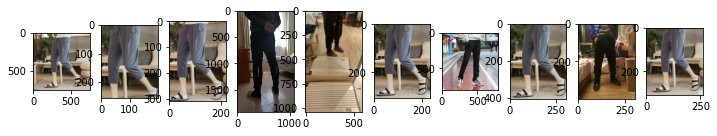

array(['11927.jpg', '11933.jpg', '11948.jpg', '10139.jpg', '8887.jpg',
       '11937.jpg', '10445.jpg', '11945.jpg', '13583.jpg', '11935.jpg'],
      dtype=object)

In [343]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network efficientnet

In [344]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [345]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [346]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [347]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [348]:
distances

[0.9193726778030396,
 0.9477109909057617,
 0.958259642124176,
 0.9806655645370483,
 0.9821999073028564,
 0.9859048128128052,
 0.9896839261054993,
 0.9899190664291382,
 0.9901548027992249,
 0.9935966730117798]

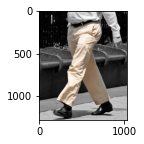

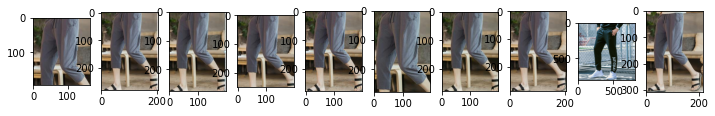

array(['11943.jpg', '11925.jpg', '11944.jpg', '11931.jpg', '11936.jpg',
       '11932.jpg', '11942.jpg', '11939.jpg', '13467.jpg', '11930.jpg'],
      dtype=object)

In [349]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network efficientnet PCA

In [350]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [351]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [352]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]
# read pca model
with open('../data/pca_nn.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [353]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [354]:
distances

[0.8082830309867859,
 0.8236219882965088,
 0.83073490858078,
 0.840460479259491,
 0.8469833135604858,
 0.850753903388977,
 0.8530353903770447,
 0.8530353903770447,
 0.8636897206306458,
 0.8651284575462341]

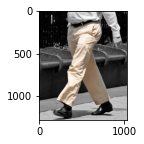

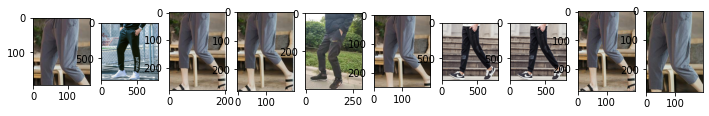

array(['11943.jpg', '13467.jpg', '11925.jpg', '11944.jpg', '8473.jpg',
       '11931.jpg', '12403.jpg', '13092.jpg', '11936.jpg', '11932.jpg'],
      dtype=object)

In [355]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Color

In [356]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [357]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)

In [358]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [359]:
distances

[0.3393556773662567,
 0.34042757749557495,
 0.34611275792121887,
 0.35169315338134766,
 0.3520969748497009,
 0.35431066155433655,
 0.3551875948905945,
 0.3578416705131531,
 0.3609164357185364,
 0.3639700412750244]

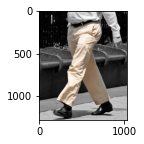

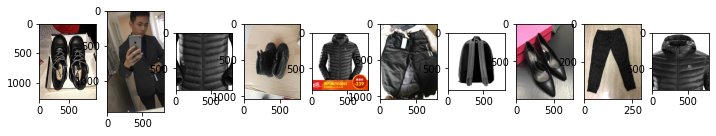

array(['19700.jpg', '2553.jpg', '625.jpg', '17101.jpg', '626.jpg',
       '12861.jpg', '34726.jpg', '19008.jpg', '14178.jpg', '629.jpg'],
      dtype=object)

In [360]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color PCA

In [361]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [362]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca model
with open('../data/pca_color.pckl', 'rb') as handle:
                    pca_color = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color.transform([img_features_color])[0]

In [363]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [364]:
distances

[0.3227556347846985,
 0.3236663341522217,
 0.3248814344406128,
 0.3257075548171997,
 0.32844388484954834,
 0.33625364303588867,
 0.33669957518577576,
 0.34072181582450867,
 0.34140169620513916,
 0.3418228328227997]

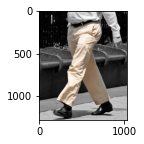

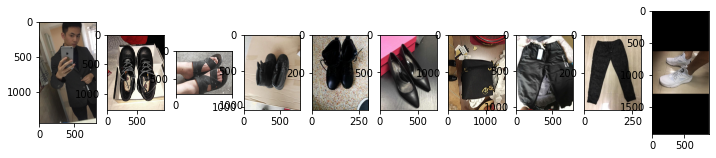

array(['2553.jpg', '19700.jpg', '24917.jpg', '17101.jpg', '16780.jpg',
       '19008.jpg', '34373.jpg', '12861.jpg', '14178.jpg', '21550.jpg'],
      dtype=object)

In [365]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions

In [366]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [367]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)

In [368]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color_center_subregions', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [369]:
distances

[1.1608020067214966,
 1.197059154510498,
 1.207796573638916,
 1.2085539102554321,
 1.2090154886245728,
 1.2090154886245728,
 1.2090154886245728,
 1.209029197692871,
 1.209029197692871,
 1.2277542352676392]

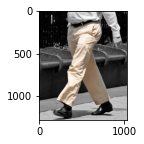

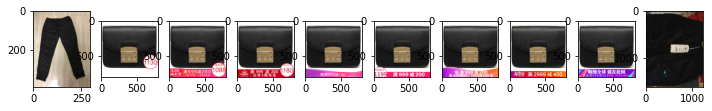

array(['14178.jpg', '36402.jpg', '36407.jpg', '36403.jpg', '36417.jpg',
       '36419.jpg', '36421.jpg', '36405.jpg', '36415.jpg', '8666.jpg'],
      dtype=object)

In [370]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions PCA

In [371]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [372]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)
# read pca model
with open('../data/pca_color_center_subregions.pckl', 'rb') as handle:
                    pca_color_center_subregions = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color_center_subregions.transform([img_features_color])[0]

In [373]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_center_subregions_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [374]:
distances

[0.9732468724250793,
 0.997105598449707,
 1.0367215871810913,
 1.042443037033081,
 1.0611052513122559,
 1.0687094926834106,
 1.0875258445739746,
 1.120068907737732,
 1.15313720703125,
 1.1605970859527588]

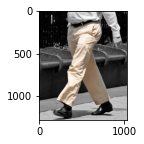

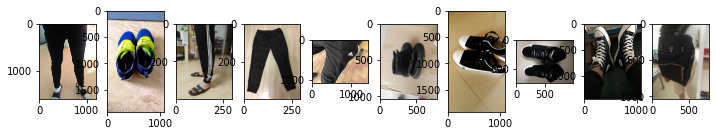

array(['9740.jpg', '26690.jpg', '13793.jpg', '14178.jpg', '7101.jpg',
       '17101.jpg', '16102.jpg', '23461.jpg', '21169.jpg', '33290.jpg'],
      dtype=object)

In [375]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG

In [376]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [377]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))

In [378]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog, retrieval_mode='hog', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [379]:
distances

[7.908188819885254,
 7.910128593444824,
 7.911540508270264,
 7.9550580978393555,
 7.9802422523498535,
 7.9830403327941895,
 8.006905555725098,
 8.014288902282715,
 8.015294075012207,
 8.016371726989746]

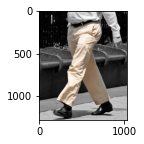

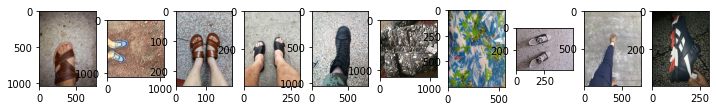

array(['23765.jpg', '16261.jpg', '24527.jpg', '19447.jpg', '17512.jpg',
       '4201.jpg', '11649.jpg', '26001.jpg', '10598.jpg', '18205.jpg'],
      dtype=object)

In [380]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG PCA

In [381]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [382]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))
# read pca model
with open('../data/pca_hog.pckl', 'rb') as handle:
                    pca_hog = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hog.transform([img_features_hog])[0]

In [383]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog_pca, retrieval_mode='hog_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [384]:
distances

[4.237183094024658,
 4.344418525695801,
 4.3825201988220215,
 4.449681282043457,
 4.451992988586426,
 4.480529308319092,
 4.481716156005859,
 4.486575126647949,
 4.486785411834717,
 4.5026702880859375]

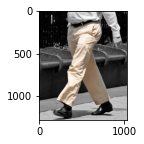

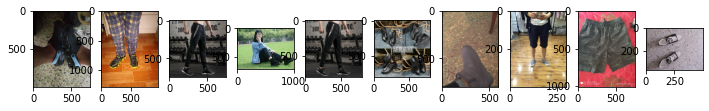

array(['22539.jpg', '18073.jpg', '9898.jpg', '15636.jpg', '12774.jpg',
       '20303.jpg', '28193.jpg', '9701.jpg', '11114.jpg', '26001.jpg'],
      dtype=object)

In [385]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color + HOG pca

In [386]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [387]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca models
with open('../data/pca_hc_hog.pckl', 'rb') as handle:
                    pca_hc_hog = pickle.load(handle)
with open('../data/pca_hc_color.pckl', 'rb') as handle:
                    pca_hc_color = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hc_hog.transform([img_features_hog])[0]
img_features_color_pca = pca_hc_color.transform([img_features_color])[0]
# merge features
img_features_merged_pca = np.hstack([img_features_hog_pca, img_features_color_pca])

In [388]:
img_features_merged_pca.shape

(300,)

In [389]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='hog_color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [390]:
distances

[4.469361782073975,
 4.504027843475342,
 4.557226657867432,
 4.576361179351807,
 4.591172695159912,
 4.612457275390625,
 4.663189888000488,
 4.686435699462891,
 4.702506065368652,
 4.712442398071289]

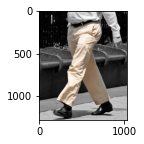

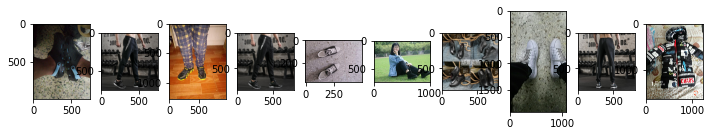

array(['22539.jpg', '9898.jpg', '18073.jpg', '12774.jpg', '26001.jpg',
       '15636.jpg', '20303.jpg', '17807.jpg', '9883.jpg', '1322.jpg'],
      dtype=object)

In [391]:
# show retrieval results
show_images(indexes, df_names, img_path)

# Test delete

In [392]:
# test delete index
retriever.delete_index('replace_value')

## Color + HOG (OLD)

In [393]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'

In [394]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))

In [395]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged, retrieval_mode='color_hog', n_neighbours=5, include_distances=True)

In [396]:
# distances

In [397]:
# # show retrieval results
# show_images(indexes, df_names)

## Color + HOG pca and standardization (OLD)

In [398]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/rpo.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [399]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))
# # read and apply scaler
# with open('../data/scaler_std.pckl', 'rb') as handle:
#                     scaler = pickle.load(handle)
# img_features_merged = scaler.transform([img_features_merged])
# # read and apply pca model
# with open('../data/pca_std.pckl', 'rb') as handle:
#                     pca = pickle.load(handle)
# # apply pca
# img_features_merged_pca = pca.transform(img_features_merged)[0]

In [400]:
# img_features_merged_pca.shape

In [401]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='color_hog_pca_std', n_neighbours=5, include_distances=True)

In [402]:
distances

[4.469361782073975,
 4.504027843475342,
 4.557226657867432,
 4.576361179351807,
 4.591172695159912,
 4.612457275390625,
 4.663189888000488,
 4.686435699462891,
 4.702506065368652,
 4.712442398071289]

In [403]:
# # show retrieval results
# show_images(indexes, df_names)

## BOVW (OLD)

In [404]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [405]:
# # BOVW extractor
# features_extractor = BOVWFeaturesExtractor('../data/')
# img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [406]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_bovw, retrieval_mode='bovw', n_neighbours=5, include_distances=True)

In [407]:
# distances

In [408]:
# # show retrieval results
# show_images(indexes, df_names)